<a href="https://colab.research.google.com/github/ssssssshy/project/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [44]:
df = pd.read_csv('CIA_Country_Facts.csv')

In [45]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [47]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18


<Axes: xlabel='Population', ylabel='Count'>

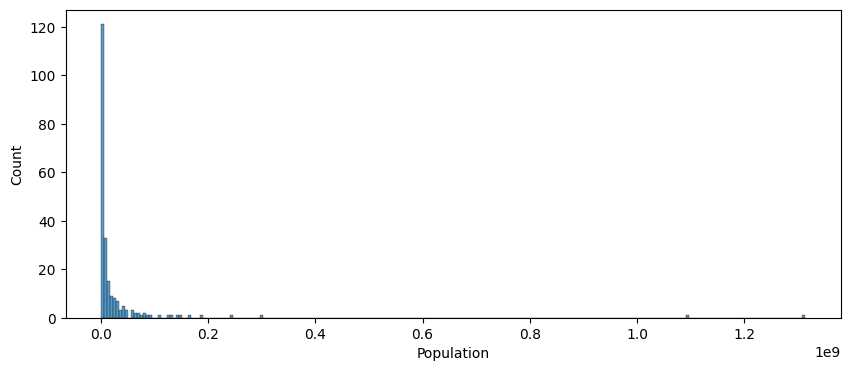

In [48]:
plt.figure(figsize=(10,4))
sns.histplot(data = df, x = 'Population')

<Axes: xlabel='Population', ylabel='Count'>

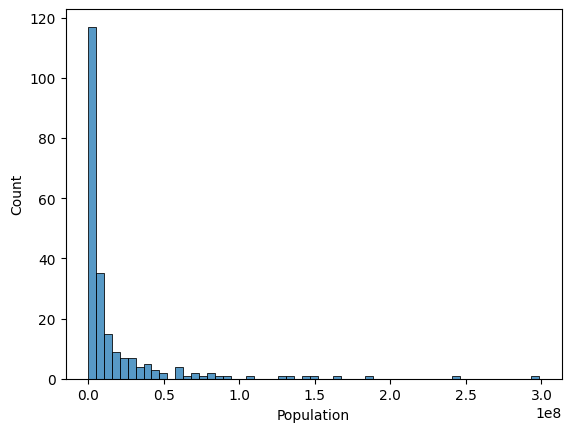

In [49]:
sns.histplot(data = df[df['Population']<500000000], x = 'Population')

<ipython-input-50-530b25e208b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Region',y = 'GDP ($ per capita)',palette='Set2')


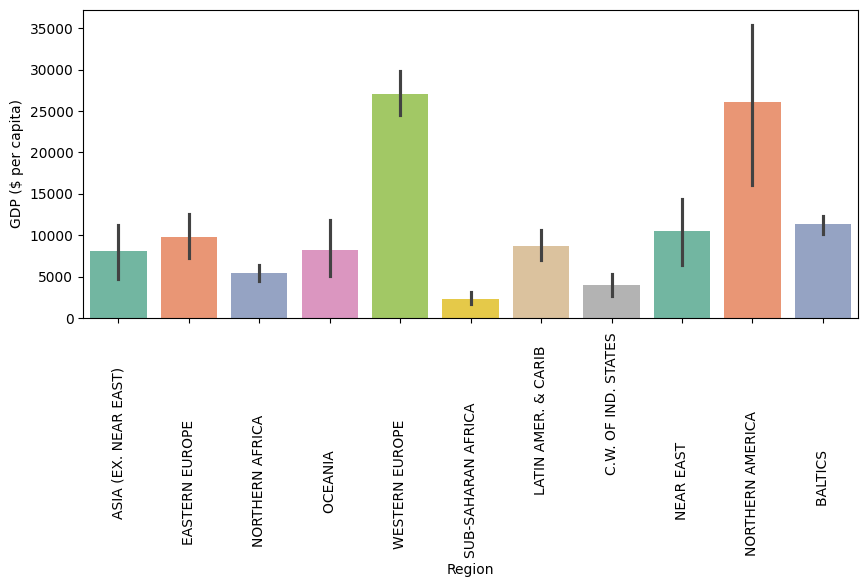

In [50]:
plt.figure(figsize=(10,4))
sns.barplot(data = df, x = 'Region',y = 'GDP ($ per capita)',palette='Set2')
plt.xticks(rotation = 90);

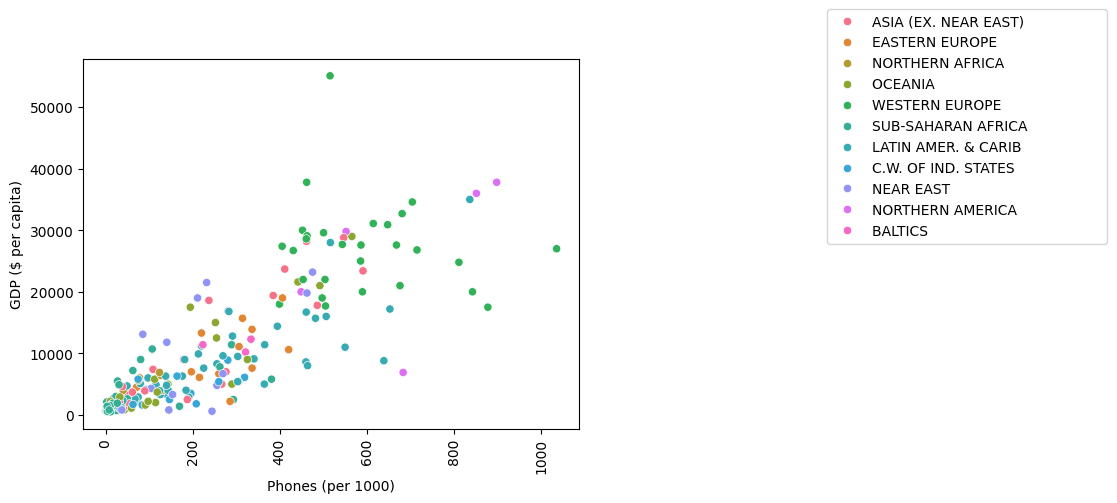

In [51]:
sns.scatterplot(data =df,x='Phones (per 1000)',y='GDP ($ per capita)',hue = 'Region')
plt.xticks(rotation = 90);
plt.legend(loc=(1.5,0.5))

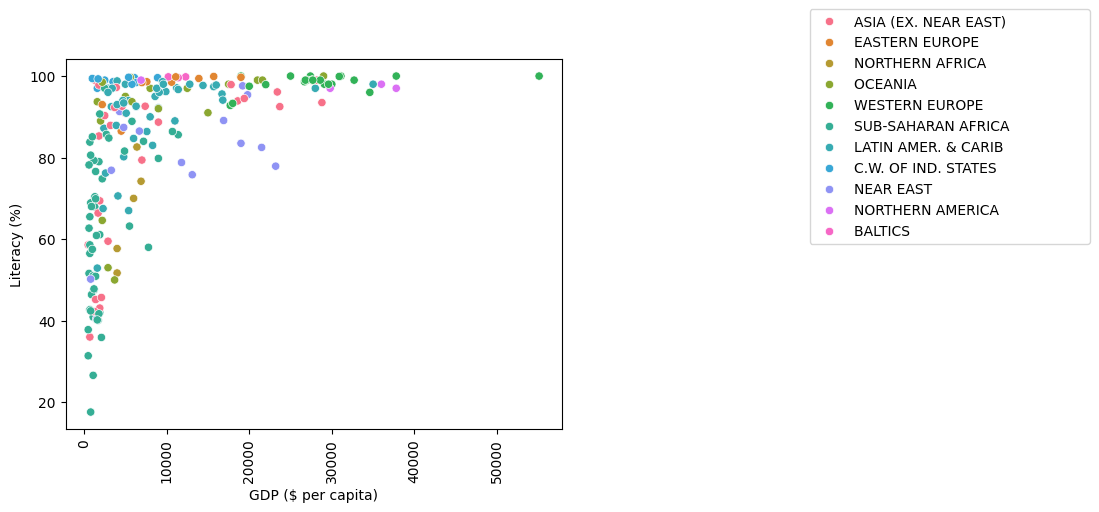

In [52]:
sns.scatterplot(data =df,y='Literacy (%)',x='GDP ($ per capita)',hue = 'Region')
plt.xticks(rotation = 90);
plt.legend(loc=(1.5,0.5))

<Axes: >

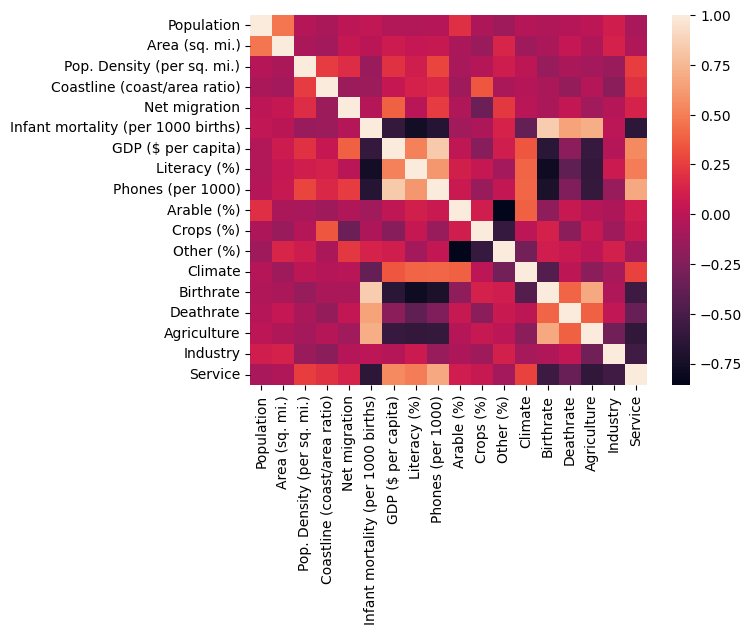

In [53]:
sns.heatmap(df.corr(numeric_only=True))

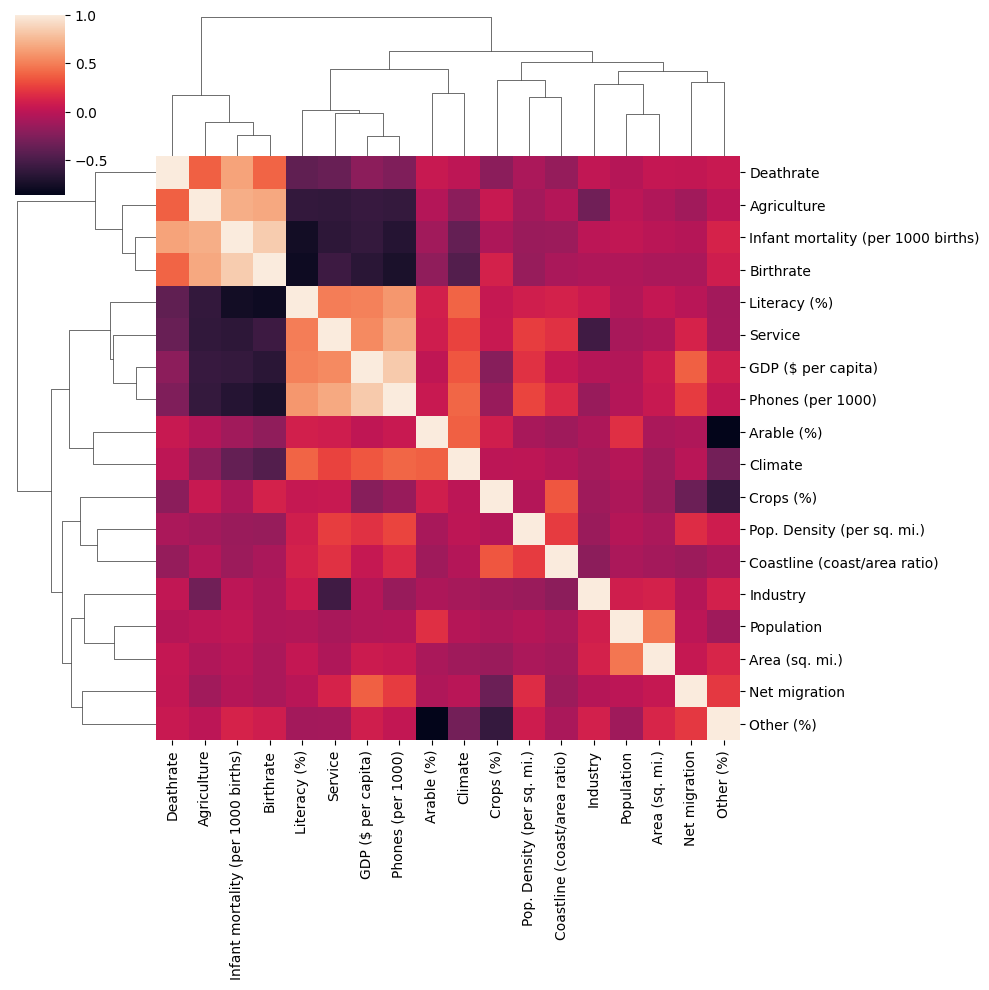

In [54]:
sns.clustermap(df.corr(numeric_only=True))

In [55]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18


In [56]:
df[df['Agriculture'].isnull()]['Country']

,Country
3,American Samoa
4,Andorra
78,Gibraltar
80,Greenland
83,Guam
134,Mayotte
140,Montserrat
144,Nauru
153,N. Mariana Islands
171,Saint Helena


In [57]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

In [58]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,1
Infant mortality (per 1000 births),1
GDP ($ per capita),0
Literacy (%),13


In [59]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [61]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,1
Infant mortality (per 1000 births),1
GDP ($ per capita),0
Literacy (%),13


In [62]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [64]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,1
Infant mortality (per 1000 births),1
GDP ($ per capita),0
Literacy (%),0


In [66]:
df.dropna(inplace=True)

In [67]:
df.isnull().sum()

,0
Country,0
Region,0
Population,0
Area (sq. mi.),0
Pop. Density (per sq. mi.),0
Coastline (coast/area ratio),0
Net migration,0
Infant mortality (per 1000 births),0
GDP ($ per capita),0
Literacy (%),0


In [69]:
X = df.drop('Country',axis = 1)

In [70]:
X = pd.get_dummies(X)

In [71]:
X.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),...,Region_BALTICS,Region_C.W. OF IND. STATES,Region_EASTERN EUROPE,Region_LATIN AMER. & CARIB,Region_NEAR EAST,Region_NORTHERN AFRICA,Region_NORTHERN AMERICA,Region_OCEANIA,Region_SUB-SAHARAN AFRICA,Region_WESTERN EUROPE
0,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,...,False,False,False,False,False,False,False,False,False,False
1,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,...,False,False,True,False,False,False,False,False,False,False
2,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,...,False,False,False,False,False,True,False,False,False,False
3,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,...,False,False,False,False,False,False,False,True,False,False
4,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,...,False,False,False,False,False,False,False,False,False,True


In [73]:
scaler = StandardScaler()

In [74]:
X_scale = scaler.fit_transform(X)

In [75]:
X_scale

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

In [91]:
ssd = []

for k in range(2,30):
  model_kmeans = KMeans(n_clusters=k)
  model_kmeans.fit(X_scale)
  ssd.append(model_kmeans.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

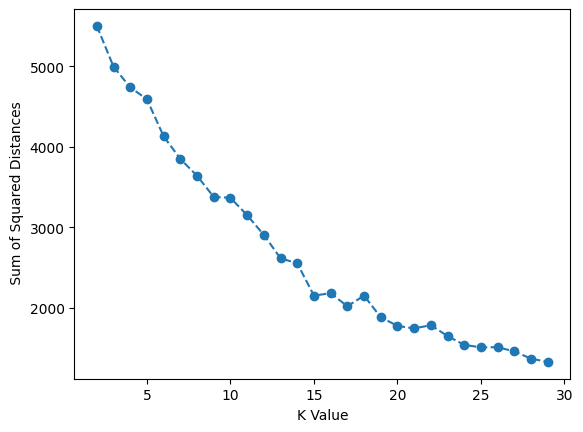

In [92]:
plt.plot(range(2,30),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

<Axes: >

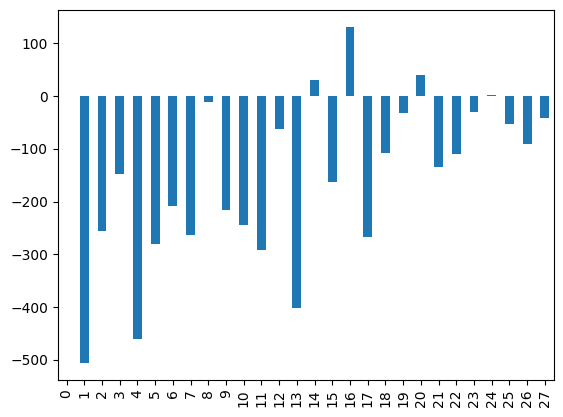

In [93]:
pd.Series(ssd).diff().plot(kind='bar')

In [94]:
model = KMeans(n_clusters=7)
model.fit(X_scale)

KMeans(n_clusters=7)

In [95]:
model.labels_

array([3, 5, 4, 1, 6, 3, 4, 4, 4, 2, 4, 0, 6, 2, 4, 4, 3, 4, 2, 6, 4, 3,
       6, 3, 4, 5, 3, 0, 4, 4, 5, 3, 3, 3, 3, 3, 0, 4, 6, 3, 3, 4, 0, 4,
       3, 3, 3, 4, 3, 5, 4, 5, 6, 3, 4, 4, 4, 4, 4, 3, 3, 5, 3, 6, 1, 6,
       6, 4, 1, 3, 3, 4, 2, 6, 3, 6, 6, 4, 4, 4, 1, 4, 3, 3, 4, 3, 4, 4,
       5, 6, 0, 4, 4, 4, 6, 6, 4, 6, 4, 4, 6, 4, 2, 3, 1, 4, 4, 4, 2, 3,
       5, 4, 3, 3, 4, 6, 5, 6, 4, 5, 3, 3, 4, 4, 3, 6, 1, 4, 3, 4, 3, 4,
       1, 2, 4, 4, 4, 3, 3, 1, 3, 6, 4, 1, 1, 4, 3, 3, 1, 6, 4, 3, 1, 4,
       1, 4, 4, 4, 5, 6, 4, 4, 4, 5, 0, 3, 4, 4, 4, 4, 4, 1, 6, 1, 4, 3,
       4, 3, 4, 5, 5, 1, 3, 3, 6, 4, 3, 4, 3, 6, 6, 4, 4, 2, 3, 4, 3, 1,
       4, 4, 4, 2, 4, 1, 3, 2, 4, 6, 0, 4, 2, 1, 4, 4, 4, 1, 4, 4, 3, 3,
       3], dtype=int32)

In [96]:
X['K=3 Clusters'] = model.labels_


In [97]:
X.corr()['K=3 Clusters'].sort_values()


,K=3 Clusters
Region_OCEANIA,-0.563066
Area (sq. mi.),-0.403168
Birthrate,-0.367757
Infant mortality (per 1000 births),-0.329848
Agriculture,-0.315636
Region_C.W. OF IND. STATES,-0.283522
Population,-0.263699
Crops (%),-0.255181
Region_SUB-SAHARAN AFRICA,-0.190794
Coastline (coast/area ratio),-0.147233
